# **Gufhtgu Publications EDA**

## **About DataSet**

This dataset contains detailed information of 200,000 online book orders in Pakistan from January 2019 to January 2021. 


**Data exlanation provided:**

* **order number:** order number.
* **order statur:** completed, cancelled, returned.
* **order date and time:** order date/time.
* **book name:** book name.
* **city address:** city adress.
* **Variables:** The dataset con

The objective of this Exploratory Data Analysis is make complete analysis of the orders in Gufhtgu:

* Best-selling book.
* Top books.
* Order status frequency.
* Cities with more orders.
* Payment method frequency.
* Maximum order peaks (month, daily).


## **Libraries**

In [1]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# LOADING THE DATA
df = pd.read_csv("GP Orders - 5.csv")
print("\n\nThe sahape of the Gufhtgu DataSet is:{}\n\n".format(df.shape))
df



The sahape of the Gufhtgu DataSet is:(19239, 8)




,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0
...,...,...,...,...,...,...,...,...
19234,71332,Completed,Linux - An Introduction,1/25/2021 12:46,Lahore,Cash on delivery,1,200.0
19235,71394,Completed,R ka Taaruf/ڈیٹا سائنس/Python Programming/Kagg...,1/25/2021 14:06,Lahore,Cash on delivery,4,200.0
19236,71418,Completed,"Blockchain, Cryptocurrency And Bitcoin/Column ...",1/25/2021 16:37,Larkana,Cash on delivery,2,500.0
19237,71419,Completed,مشین لرننگ/ڈیٹا سائنس/Artificial Intelligence/...,1/25/2021 18:01,"Mailsi, district Vehari",Cash on delivery,10,400.0


## **Understanding The Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          19239 non-null  int64  
 1   Order Status          19239 non-null  object 
 2   Book Name             19237 non-null  object 
 3   Order Date & Time     19239 non-null  object 
 4   City                  19238 non-null  object 
 5   Payment Method        19229 non-null  object 
 6   Total items           19239 non-null  int64  
 7   Total weight (grams)  19239 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Order Number,19239.0,52535.780238,15835.761148,307.0,48064.5,56436.0,63779.5,71420.0
Total items,19239.0,6.051874,576.938452,0.0,1.0,1.0,1.0,80022.0
Total weight (grams),19239.0,363.749675,834.097325,200.0,200.0,200.0,500.0,55000.0


In [5]:
df.describe(include = "O").transpose()

,count,unique,top,freq
Order Status,19239,3,Completed,17948
Book Name,19237,3525,انٹرنیٹ سے پیسہ کمائیں,2579
Order Date & Time,19239,18100,12/30/2020 21:39,7
City,19238,4163,Karachi,2332
Payment Method,19229,5,Cash on delivery,17470


In [6]:
df.isnull().sum()

Order Number             0
Order Status             0
Book Name                2
Order Date & Time        0
City                     1
Payment Method          10
Total items              0
Total weight (grams)     0
dtype: int64

We can see that there are null values in the data set, given that the data set has 19239 records, we will simply choose to eliminate the records with null values since, due to the minimal amount they represent, they do not affect our analysis at all.

In [7]:
df.columns

Index(['Order Number', 'Order Status', 'Book Name', 'Order Date & Time',
       'City', 'Payment Method', 'Total items', 'Total weight (grams)'],
      dtype='object')

In order to make it easier to write the code, we will rename the columns of the dataset with lower case letters

## **Data Cleaning And Preparation**

In [8]:
# RENAMING THE COLUMNS
df = df.rename(columns = {  
    "Order Number" : "order number",
    "Order Status" : "order status",
    "Book Name" : "book name",
    "Order Date & Time" : "order date",
    "City" : "city",
    "Payment Method" : "payment method",
    "Total items" : "total items",
    "Total weight (grams)" : "total weight"})

In [9]:
# DROPPING THE NULL VALUES
df =  df.dropna()
df.isnull().sum()

order number      0
order status      0
book name         0
order date        0
city              0
payment method    0
total items       0
total weight      0
dtype: int64

Let's take a quick look at the maximum cancelled and returned orders per city to see if we notice anything unusual.

In [10]:
c = df[df["order status"] == "Cancelled"]
c.sort_values(by = "total items", ascending = False)

,order number,order status,book name,order date,city,payment method,total items,total weight
4539,47474,Cancelled,بلاک چین اور کرپٹو کرنسی,7/15/2020 13:33,Karachi f.b area,Cash on delivery,93,46500.0
5013,48734,Cancelled,Aik thi laali aur aik tha kawwa aur dausry kah...,7/25/2020 19:10,خان پور,JazzCash,27,200.0
19226,71162,Cancelled,انٹرنیٹ سے پیسہ کمائیں/Teesra Kinara/Python Pr...,1/23/2021 23:33,Faisalabad,Cash on delivery,26,500.0
5040,48772,Cancelled,"Har Shaye Ka Nazria/Blockchain, Cryptocurrency...",7/26/2020 9:55,Pasrur,EasyPaisa,10,1000.0
5050,48785,Cancelled,"Har Shaye Ka Nazria/Blockchain, Cryptocurrency...",7/26/2020 13:57,Pasrur,EasyPaisa,10,1000.0
...,...,...,...,...,...,...,...,...
4519,47419,Cancelled,Product Management,7/15/2020 5:36,Gambat p o fiqra abad district khair pur talks...,JazzCash,1,500.0
4493,47333,Cancelled,بلاک چین اور کرپٹو کرنسی,7/13/2020 22:19,Daur,JazzCash,1,500.0
4428,47180,Cancelled,Akhuwat Ka Safar,7/12/2020 17:50,karachi,Cash on delivery,1,200.0
4396,47132,Cancelled,بلاک چین اور کرپٹو کرنسی,7/12/2020 11:41,Lahore,EasyPaisa,1,500.0


Nothing out of the ordinary, the weight in grams of order number 47474 seems reasonable considering the number of books ordered.

In [11]:
r = df[df["order status"] == "Returned"]
r.sort_values(by = "total items", ascending = False)

,order number,order status,book name,order date,city,payment method,total items,total weight
15981,66499,Returned,انٹرنیٹ سے پیسہ کمائیں,12/27/2020 1:37,City,EasyPaisa,80022,200.0
14046,63087,Returned,انٹرنیٹ سے پیسہ کمائیں/Breakthrough by Dr Jami...,11/29/2020 16:19,tuqtta,Cash on delivery,440,200.0
12261,60238,Returned,انٹرنیٹ سے پیسہ کمائیں,11/12/2020 1:12,Nawab shah,JazzCash,369,200.0
16001,66525,Returned,انٹرنیٹ سے پیسہ کمائیں,12/27/2020 9:38,Haifzabad,EasyPaisa,280,200.0
14260,63549,Returned,"Blockchain, Cryptocurrency And Bitcoin",12/2/2020 18:26,Waziristan Agency,BankTransfer,150,7500.0
...,...,...,...,...,...,...,...,...
11657,59351,Returned,انٹرنیٹ سے پیسہ کمائیں,11/2/2020 14:23,Doha,BankTransfer,1,200.0
11668,59364,Returned,انٹرنیٹ سے پیسہ کمائیں,11/2/2020 17:19,Rawalpindi,BankTransfer,1,200.0
11681,59384,Returned,"Blockchain, Cryptocurrency And Bitcoin",11/2/2020 19:45,Hangu,EasyPaisa,1,500.0
11682,59387,Returned,انٹرنیٹ سے پیسہ کمائیں,11/2/2020 20:29,karachi,JazzCash,1,200.0


The order 66499 does not seem at all a legitimate registration, a weight of 200 grams for 80022 books is unjustifiable, it is most likely a human error at the time of recording the operation or extract the information.

In [12]:
df = df.drop(15981)

let's do one last check to make sure there is nothing unusual about the weight. 

In [13]:
df.sort_values(by = "total weight", ascending = False)##.head(50)

,order number,order status,book name,order date,city,payment method,total items,total weight
8737,55170,Returned,"Blockchain, Cryptocurrency And Bitcoin",9/18/2020 10:55,Hub city,EasyPaisa,101,55000.0
4539,47474,Cancelled,بلاک چین اور کرپٹو کرنسی,7/15/2020 13:33,Karachi f.b area,Cash on delivery,93,46500.0
16857,67663,Returned,اجالوں کا سفر/Dasht e Wafa/Python Programming/...,1/2/2021 13:02,Lahore,BankTransfer,100,36500.0
16861,67667,Returned,اجالوں کا سفر/Dasht e Wafa/Python Programming/...,1/2/2021 13:21,Lahore,JazzCash,106,35600.0
16862,67668,Returned,اجالوں کا سفر/Dasht e Wafa/Python Programming/...,1/2/2021 13:22,Lahore,JazzCash,106,34500.0
...,...,...,...,...,...,...,...,...
9761,56621,Completed,Python Programming,10/11/2020 19:11,"Kot muhammad ameer, p/o kot radha kishan.",Cash on delivery,1,200.0
9764,56624,Completed,Python Programming,10/11/2020 19:35,Gujranwla,Cash on delivery,1,200.0
9765,56625,Completed,Python Programming,10/11/2020 19:47,Hangu,Cash on delivery,1,200.0
9768,56628,Completed,Animal Farm-Urdu,10/11/2020 19:55,Turbat,Cash on delivery,1,200.0


In [14]:
# df["Book_Name"].head(50)
# df["Book_Name"].tail(50)

In [15]:
len(df["book name"].unique())

3518

In [16]:
df["book name"] = df["book name"].str.lower()

# REPLACING SPECIAL CHARACTERS
df["book name"] = df["book name"].str.replace("(" , "").str.replace(")" , "")
df["book name"] = df["book name"].str.replace("[" , "").str.replace("]" , "")

# CORRECTING SOME BOOK NAMES
df["book name"] = df["book name"].str.replace("python programming- release date: august 14, 2020" , "python programming")
df["book name"] = df["book name"].str.replace("انٹرنیٹ سے پیسہ کمائیں؟- مستحقین زکواة" , "")
df["book name"] = df["book name"].str.replace("molo masali - مولو مصلی" , "molo masali" )
df["book name"] = df["book name"].str.replace("r ka taaruf  آر کا تعارف" , "r ka taaruf")
df["book name"] = df["book name"].str.replace("linux - an introduction release data - october 3, 2020" , "linux - an introduction")

In [17]:
df["book name"].value_counts().head(10)

انٹرنیٹ سے پیسہ کمائیں                    2578
python programming                        1888
blockchain, cryptocurrency and bitcoin    1067
product management                        1041
artificial intelligence                    900
justju ka safar-1                          881
molo masali                                534
ڈیٹا سائنس ۔ ایک تعارف                     495
lucky draw - free book                     487
column nigari kese sekhain                 418
Name: book name, dtype: int64

We will see later if we can traduce the book titles, but first we will take care of the rows that have multiple book titles.

In [18]:
df["book name"] = df["book name"].str.split("/").str[0]
df["book name"].nunique()

659

In [19]:
df["book name"].value_counts().head(10)

انٹرنیٹ سے پیسہ کمائیں                    3036
python programming                        2180
artificial intelligence                   1314
blockchain, cryptocurrency and bitcoin    1294
product management                        1141
justju ka safar-1                         1042
molo masali                                575
ڈیٹا سائنس ۔ ایک تعارف                     541
lucky draw - free book                     505
c++                                        467
Name: book name, dtype: int64

In [20]:
df["book name"] = df["book name"].str.replace("har shaye ka nazria - ہر شے کا نظریہ", "har shaye ka nazria")
df["book name"] = df["book name"].str.replace("bit coin block chain aur crypto currency بٹ کوائن، بلاک چین اور کرپٹو کرن", "bit coin block chain aur crypto currency")
df["book name"] = df["book name"].str.replace("justuju ka safar جستجو کا سفر", "justuju ka safar")
df["book name"] = df["book name"].str.replace("سی", "c")
df["book name"] = df["book name"].str.replace("shaoor شعور۔ علم سے آگہی کا سفر", "Consciousness. A journey from knowledge to awareness")
df["book name"] = df["book name"].str.replace("justuju ka safar جستجو کا سفر", "A journey of discovery")
df["book name"] = df["book name"].str.replace("ادھورے گناہ", "Unfulfilled sins")
df["book name"] = df["book name"].str.replace("ڈیٹا سائنس ۔ ایک تعارف", "Data science. An introduction")

In [21]:
df["book name"] = df["book name"].str.replace("java  جاوا 2", "java 2")
df["book name"] = df["book name"].str.replace("irteqa shaheen - ارتقاء شاہین", "irteqa shaheen")
df["book name"] = df["book name"].str.replace("جستجو کا سفر. حصہ اول", "A journey of discovery. Part I")
df["book name"] = df["book name"].str.replace("سکینۃاولیاء", "Sakina Awaliya")
df["book name"] = df["book name"].str.replace("ملک ملک کی کہانیاں", "Country stories")
df["book name"] = df["book name"].str.replace("12عظیم مسلمان فلسفی", "")
df["book name"] = df["book name"].str.replace("یادگار شخصیات", "Memorable personalities")
df["book name"] = df["book name"].str.replace("چند ھم  عصر", "A few contemporaries")
df["book name"] = df["book name"].str.replace("چچا تیز گام", "Uncle Tez Gam")
df["book name"] = df["book name"].str.replace("بچوں اور بڑوں کے برکت والے نام", "Blessed names for children and adults")

In [22]:
df["book name"] = df["book name"].str.replace("قلعہ بند شہزادی", "Castle Princess")
df["book name"] = df["book name"].str.replace("مرۃالعروس", "Marrat al-Aros")
df["book name"] = df["book name"].str.replace("حضرت علی المرتضی", "Hazrat Ali Murtaza")
df["book name"] = df["book name"].str.replace("حضرت اویس قرنی", "Hazrat Owais Qarni")
df["book name"] = df["book name"].str.replace("اسلام جمہوریت اور خلافت", "Islam Democracy and Caliphate")
df["book name"] = df["book name"].str.replace("اقبال بچوں اور نوجوانوں کے لئے", "Iqbal for children and youth")
df["book name"] = df["book name"].str.replace("پطرس کے مضامین", "Peter's Essays")
df["book name"] = df["book name"].str.replace("نسوانی حسن کی حفاظت", "Protection of feminine beauty")
df["book name"] = df["book name"].str.replace("فقہ عمر", "Jurisprudence of age")

In [23]:
df["book name"] = df["book name"].str.replace("لاک چین اور کرپٹو کرنسی", "Blockchain and Cryptocurrency")
df["book name"] = df["book name"].str.replace("حسین بن منصور حلاج حیات وکلام", "Hussain bin Mansoor Hallaj Hayat and Kalam")
df["book name"] = df["book name"].str.replace("شہد سے اپنا علاج خود کیجئے", "Treat yourself with honey")
df["book name"] = df["book name"].str.replace("ابلیس", "Iblis")
df["book name"] = df["book name"].str.replace("ہم کہاں کے سچے تھے", "Where were we really?")
df["book name"] = df["book name"].str.replace("حیات حضرت خضر", "Hayat Hazrat Khizr")
df["book name"] = df["book name"].str.replace("ای کامرس", "E-commerce")
df["book name"] = df["book name"].str.replace("سائسں ساکن تھی", "The woman was still")
df["book name"] = df["book name"].str.replace("ڈیٹا سائنس", "Data science")
df["book name"] = df["book name"].str.replace("شوگر کو شکست دے", "Beat the sugar")
df["book name"] = df["book name"].str.replace("امام حسن اور خلافت راشدہ", "Imam Hasan and the Rashidah Caliphate")

In [24]:
df["book name"] = df["book name"].str.replace("ان پیج 200", "In page 200")
df["book name"] = df["book name"].str.replace("انٹرنیٹ سے پیسہ کمائیں", "Make money from the internet")
df["book name"] = df["book name"].str.replace("مشین لرننگ", "Machine learning")
df["book name"] = df["book name"].str.replace("ایک تھا الگورتھم", "One was the algorithm")
df["book name"] = df["book name"].str.replace("آپ کیسے کروڑ پتی بن سکتے ہیں", "How can you become a millionaire?")
df["book name"] = df["book name"].str.replace("بوسنیا پر کیا گذری؟", "What happened to Bosnia?")
df["book name"] = df["book name"].str.replace("ارفع کریم", "Arfa Karim")
df["book name"] = df["book name"].str.replace("انسان کی منزل", "The destiny of man")
df["book name"] = df["book name"].str.replace("زندگی", "Life")

In [25]:
df["book name"] = df["book name"].str.replace("رب چاہی", "God willing")
df["book name"] = df["book name"].str.replace("ابن الوقت", "son of time")
df["book name"] = df["book name"].str.replace("بنات النعش", "Banat al-Nash")
df["book name"] = df["book name"].str.replace("اجالوں کا سفر", "Journey of the Ajals")
df["book name"] = df["book name"].str.replace("تاریخ کے گمشدہ اوراق", "The missing pages of history")
df["book name"] = df["book name"].str.replace("ارمغان حجاز", "Armaghan Hijaz")
df["book name"] = df["book name"].str.replace("آداب مباشرت", "Intimate manners")
df["book name"] = df["book name"].str.replace("تذکرہ اولیائے جہلم", "Mention of Saints of Jhelum")
df["book name"] = df["book name"].str.replace("زرد کاغذ", "Yellow paper")
df["book name"] = df["book name"].str.replace("zavia    زاویہ", "zavia")
df["book name"] = df["book name"].str.replace("hazir ghayab حاضر غائب", "hazir ghayab")
df["book name"] = df["book name"].str.replace("ارطغرل غازیc", "Ertugrul Ghazi")
df["book name"] = df["book name"].str.replace("حcن بن منصور حلاج حیات وکلام", "Hana bin Mansoor Hallaj Life and Words")
df["book name"] = df["book name"].str.replace("ایڈونچر کہانیاں", "Adventure stories")
df["book name"] = df["book name"].str.replace("بلاک چین اور کرپٹو کرن", "Blockchain y Criptomonedas")
df["book name"] = df["book name"].str.replace("bit coin block chain aur crypto currency بٹ کوائن", "bit coin block chain aur crypto currency")
df["book name"] = df["book name"].str.replace("Blockchain y Criptomonedasc", "Blockchain y Criptomonedas")

In [26]:
df["book name"] = df["book name"].str.capitalize()

In [27]:
#city = df["city"].unique()
#for i in city:
#    print(i)

It is necessary to clean the column corresponding to the city since most of them are not written in the correct way. 

In [28]:
df["city"] = df["city"].str.lower()

In [29]:
cities = ['islamabad', 'ahmed nager chatha', 'ahmadpur east', 'ali khan abad', 'alipur', 'arifwala', 'attock', 'bhera',
              'bhalwal', 'bahawalnagar','bahawalpur', 'bhakkar', 'burewala', 'chillianwala', 'chakwal', 'chichawatni',
              'chiniot', 'chishtian',
              'daska', 'darya khan', 'dera ghazi khan', 'dhaular', 'dina', 'dinga', 'dipalpur', 'faisalabad', 'ferozewala',
              'fateh jhang','ghakhar mandi', 'gojra', 'gujranwala', 'gujrat', 'gujar khan', 'hafizabad', 'haroonabad', 'hasilpur',
              'haveli lakha', 'jatoi',
              'jalalpur', 'jattan', 'jampur', 'jaranwala', 'jhang', 'jhelum', 'kalabagh', 'karor lal esan', 'kasur', 'kamalia', 'kamoke',
              'khanewal',
              'khanpur', 'kharian', 'khushab', 'kot addu', 'jauharabad', 'lahore', 'lalamusa', 'layyah', 'liaquat pur',
              'lodhran', 'malakwal', 'mamoori', 'mailsi', 'mandi bahauddin', 'mian channu', 'mianwali', 'multan', 'murree', 
              'muridke', 'mianwali bangla', 'muzaffargarh', 'narowal', 'nankana sahib', 'okara', 'renala khurd', 'pakpattan', 
              'pattoki', 'pir mahal', 'qaimpur', 'qila didar singh', 'rabwah', 'raiwind', 'rajanpur', 'rahim yar khan',
              'rawalpindi',
              'sadiqabad', 'safdarabad', 'sahiwal', 'sangla hill', 'sarai alamgir', 'sargodha', 'shakargarh', 'sheikhupura',
              'sialkot',
              'sohawa', 'soianwala', 'siranwali', 'talagang', 'taxila', 'toba tek singh', 'vehari', 'wah cantonment', 
              'wazirabad',
              'badin', 'bhirkan', 'rajo khanani', 'chak', 'dadu', 'digri', 'diplo', 'dokri', 'ghotki', 'haala', 'hyderabad',
              'islamkot', 'jacobabad', 'jamshoro', 'jungshahi', 'kandhkot', 'kandiaro', 'karachi', 'kashmore', 'keti bandar',
              'khairpur', 'kotri', 'larkana', 'matiari', 'mehar', 'mirpur khas', 'mithani', 'mithi', 'mehrabpur', 'moro',
              'nagarparkar', 'naudero', 'naushahro feroze', 'naushara', 'nawabshah', 'nazimabad', 'qambar', 'qasimabad', 
              'ranipur', 'ratodero', 'rohri', 'sakrand', 'sanghar', 'shahbandar', 'shahdadkot', 'shahdadpur',
              'shahpur chakar', 'shikarpaur', 'sukkur', 'tangwani', 'tando adam khan', 'tando allahyar',
              'tando muhammad khan', 'thatta', 'umerkot', 'warah', 'abbottabad', 'adezai', 'alpuri', 'akora khattak',
              'ayubia', 'banda daud shah', 'bannu', 'batkhela', 'battagram', 'birote', 'chakdara', 'charsadda', 'chitral',
              'daggar', 'dargai', 'darya khan', 'dera ismail khan', 'doaba', 'dir', 'drosh', 'hangu', 'haripur', 'karak',
              'kohat', 'kulachi', 'lakki marwat', 'latamber', 'madyan', 'mansehra', 'mardan', 'mastuj', 'mingora', 'nowshera',
              'paharpur', 'pabbi', 'peshawar', 'saidu sharif', 'shorkot', 'shewa adda', 'swabi', 'swat', 'tangi', 'tank',
              'thall', 'timergara', 'tordher', 'awaran', 'barkhan', 'chagai', 'dera bugti', 'gwadar', 'harnai', 'jafarabad',
              'jhal magsi', 'kacchi', 'kalat', 'kech', 'kharan', 'khuzdar', 'killa abdullah', 'killa saifullah', 'kohlu',
              'lasbela', 'lehri', 'loralai', 'mastung', 'musakhel', 'nasirabad', 'nushki', 'panjgur', 'pishin valley', 
              'quetta', 'sherani', 'sibi', 'sohbatpur', 'washuk', 'zhob', 'ziarat']

In [30]:
# FUNCTION TO CORRECT THE NAME OF THE CITY
def extract_city_name(data):
    for city in cities:
        if(city in data):
            return city
        
    return data

df['city'] = df['city'].apply(extract_city_name)
df['city'].nunique()

1874

In [31]:
import nltk

# REMOVING ALL INCORRECT NAMES USING NLKT LIBRARY
def clean_city(row):
    address = row.city.split()
    add = set()
    for a in address:
        a = a.strip()
        if a:
            add.add(a)
    for city in cities:
        if row.city.__contains__(city):
            return city
        
    for a in add:
        for c in cities:
            if nltk.edit_distance(a, c) <= 15: # considering spelling mistakes upto 5 letters
                return c
    return row.city

In [32]:
df['city'] = df.apply(clean_city, axis = 1)
df['city'].nunique()

192

In [33]:
df["city"] = df["city"].str.capitalize()

Finally we proceed to extract the year, month, day and time from the order date column.

In [34]:
df["order date"] = pd.to_datetime(df["order date"])
df["year"] = df["order date"].dt.year
df["month"] = df["order date"].dt.month_name()
df["mn"] = df["order date"].dt.month
df["day"] = df["order date"].dt.day_name()
df["time"] = df["order date"].dt.time
df['my'] = df['order date'].dt.to_period('M')

df.head(1)

,order number,order status,book name,order date,city,payment method,total items,total weight,year,month,mn,day,time,my
1,308,Completed,Kaggle for begginers,2019-10-03 15:54:00,Rawalpindi,Cash on Delivery (COD),1,200.0,2019,October,10,Thursday,15:54:00,2019-10


## **Data Analysis & Visualization**

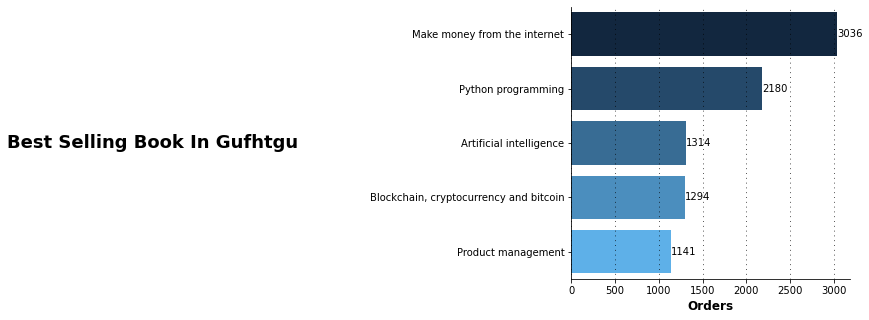

In [35]:
book = df["book name"].value_counts().head(5).rename_axis("book name").reset_index(name = "count")

# POSITION
fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(nrows = 1, ncols = 2, wspace = 1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE
ax0.text(0.5, 0.5,
        "Best Selling Book In Gufhtgu",
        fontsize = 18,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# BARPLOT
ax1.grid(color = "#000000", linestyle = ":", axis = "x", zorder = 0, dashes = (1,5))
sns.barplot(data = book, x = "count", y = "book name", palette = sns.blend_palette(["#0A2647","#47B5FF"], n_colors = 5), ax = ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel("Orders", fontsize = 12, fontweight = "bold")
ax1.set_ylabel("")
ax1.spines[["top", "right"]].set_visible(False)

plt.show()

The best-selling book on Gufhtgu is "Make money from the internet". Let's see in which cities it has the largest market presence.

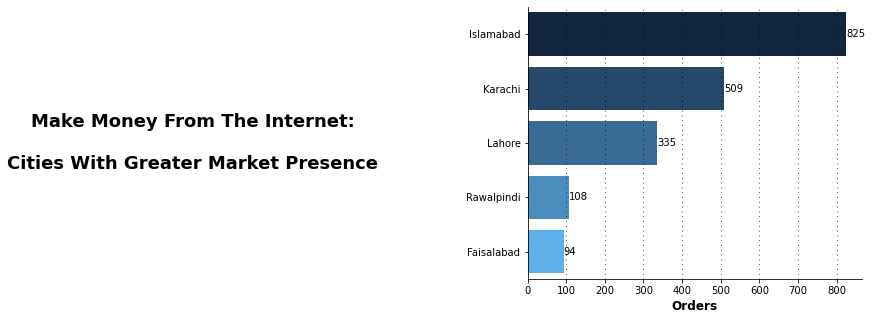

In [36]:
book = df[df["book name"] == "Make money from the internet"]
book = book["city"].value_counts().head(5).rename_axis("city").reset_index(name = "count")

# POSITION
fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(nrows = 1, ncols = 2, wspace = .5)
ax0 =fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# Background
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE
ax0.text(0.5, 0.5,
        "Make Money From The Internet:\n\nCities With Greater Market Presence",
        fontsize = 18,
        fontweight = "bold",
        verticalalignment = "center",
        horizontalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.set_ylabel("")
ax0.set_xlabel("")
ax0.spines[["top", "right", "bottom","left"]].set_visible(False)

# BARPLOT
ax1.grid(color = "#000000", linestyle = ":", axis = "x", zorder = 0, dashes = (1,5))
sns.barplot(data = book, x = "count", y = "city", palette = sns.blend_palette(["#0A2647","#47B5FF"],n_colors = 5),ax = ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel("Orders", fontsize = 12, fontweight = "bold")
ax1.set_ylabel("")
ax1.spines[["top", "right"]].set_visible(False)

plt.show()

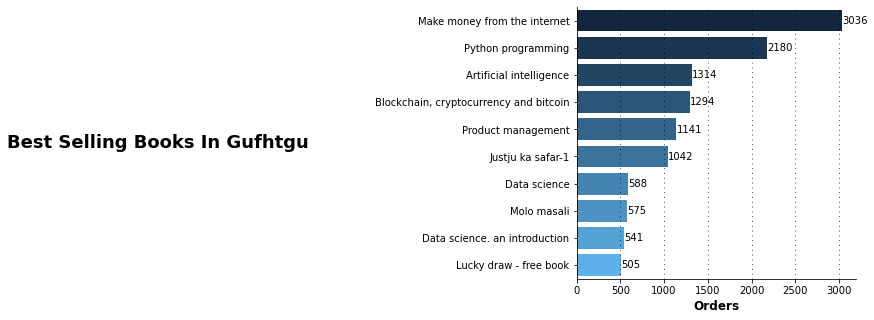

In [37]:
book = df["book name"].value_counts().head(10).rename_axis("book name").reset_index(name = "count")

# POSITION
fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(nrows = 1, ncols = 2, wspace = 1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE
ax0.text(0.5, 0.5,
        "Best Selling Books In Gufhtgu",
        fontsize = 18,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# BARPLOT
ax1.grid(color = "#000000", linestyle = ":", axis = "x", zorder = 0, dashes = (1,5))
sns.barplot(data = book, x = "count", y = "book name", palette = sns.blend_palette(["#0A2647","#47B5FF"], n_colors = 10), ax = ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel("Orders", fontsize = 12, fontweight = "bold")
ax1.set_ylabel("")
ax1.spines[["top", "right"]].set_visible(False)

plt.show()

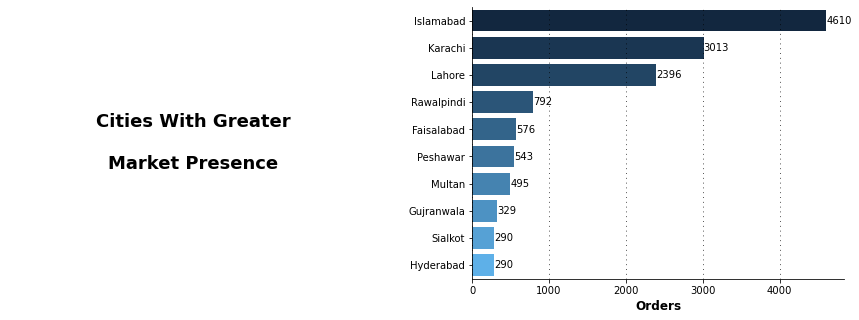

In [38]:
book = df["city"].value_counts().head(10).rename_axis("city").reset_index(name = "count")

# POSITION
fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(nrows = 1, ncols = 2, wspace = .25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE
ax0.text(0.5, 0.5,
        "Cities With Greater\n\nMarket Presence",
        fontsize = 18,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# BARPLOT
ax1.grid(color = "#000000", linestyle = ":", axis = "x", zorder = 0, dashes = (1,5))
sns.barplot(data = book, x = "count", y = "city", palette = sns.blend_palette(["#0A2647","#47B5FF"], n_colors = 10), ax = ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel("Orders", fontsize = 12, fontweight = "bold")
ax1.set_ylabel("")
ax1.spines[["top", "right"]].set_visible(False)

plt.show()

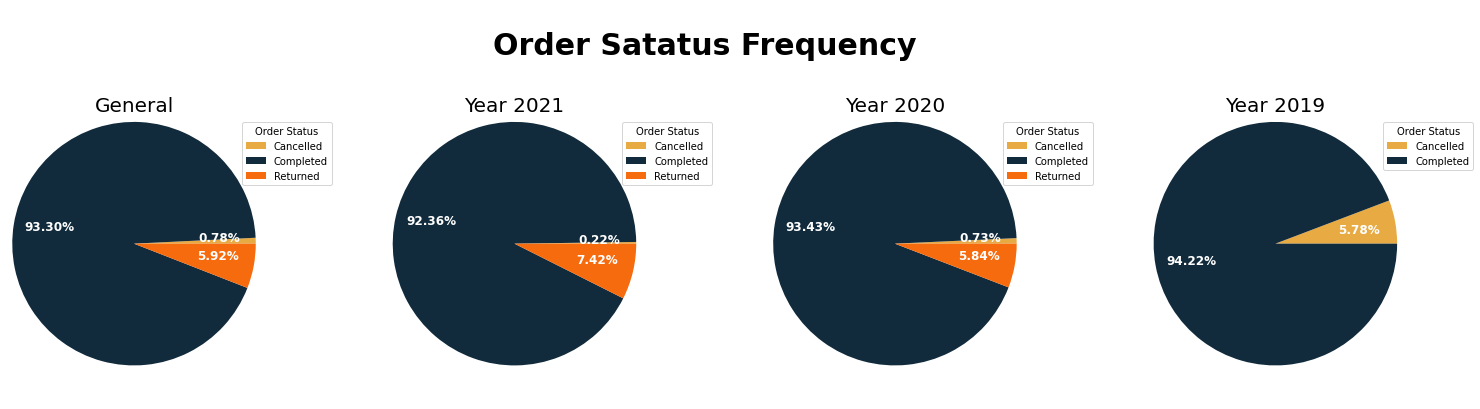

In [39]:
result = df.groupby("order status")["order status"].count()
result2 = df[df["year"] == 2021].groupby("order status")["order status"].count()
result3 = df[df["year"] == 2020].groupby("order status")["order status"].count()
result4 = df[df["year"] == 2019].groupby("order status")["order status"].count()
palette = ["#E8AA42", "#112B3C", "#F66B0E"]

# POSITION
fig = plt.figure(figsize = (25,8))
gs = fig.add_gridspec(nrows = 2,ncols = 4, hspace = -.9, wspace = .5)
ax0 = fig.add_subplot(gs[0,2])
ax1 = fig.add_subplot(gs[1,0,])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])
ax4 = fig.add_subplot(gs[1,3])

# TITLE
ax0.text(-.25, .9,
        "Order Satatus Frequency",
        fontsize = 30,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(right = False, left = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL FREQUENCY
ax1.set_title("General", fontsize = 20, loc = "center")
ax1.pie(result.values, labels = None, autopct='%1.2f%%', textprops={"color":"w", "fontsize":"12", "fontweight":"bold", "verticalalignment":"baseline"}, pctdistance = 0.7, radius=1.2, colors = palette)
ax1.legend(title="Order Status", labels = result.index, bbox_to_anchor=(1.3,1), loc="upper right", fontsize=10,)

# FREQUENCY 2021
ax2.set_title("Year 2021", fontsize = 20, loc = "center")
ax2.pie(result2.values, labels = None, autopct='%1.2f%%', textprops={"color":"w", "fontsize":"12", "fontweight":"bold", "verticalalignment":"baseline"}, pctdistance = 0.7, radius=1.2, colors = palette)
ax2.legend(title="Order Status", labels = result2.index, bbox_to_anchor=(1.3,1), loc="upper right", fontsize=10,)

# FREQUENCY 2020
ax3.set_title("Year 2020", fontsize = 20, loc = "center")
ax3.pie(result3.values, labels = None, autopct='%1.2f%%', textprops={"color":"w", "fontsize":"12", "fontweight":"bold", "verticalalignment":"baseline"}, pctdistance = 0.7, radius=1.2, colors = palette)
ax3.legend(title="Order Status", labels = result3.index, bbox_to_anchor=(1.3,1), loc="upper right", fontsize=10,)

# FREQUENCY 2019
ax4.set_title("Year 2019", fontsize = 20, loc = "center")
ax4.pie(result4.values, labels = None, autopct='%1.2f%%', textprops={"color":"w", "fontsize":"12", "fontweight":"bold", "verticalalignment":"center_baseline"}, pctdistance = 0.7, radius=1.2, colors = palette)
ax4.legend(title="Order Status", labels = result4.index, bbox_to_anchor=(1.3,1), loc="upper right", fontsize=10,)

plt.show() 

In [40]:
df["payment method"].value_counts()

Cash on delivery          17470
EasyPaisa                   695
JazzCash                    596
BankTransfer                457
Cash on Delivery (COD)        7
Name: payment method, dtype: int64

In [41]:
df["payment method"] = df["payment method"].replace("Cash on Delivery (COD)", "Cash on delivery")

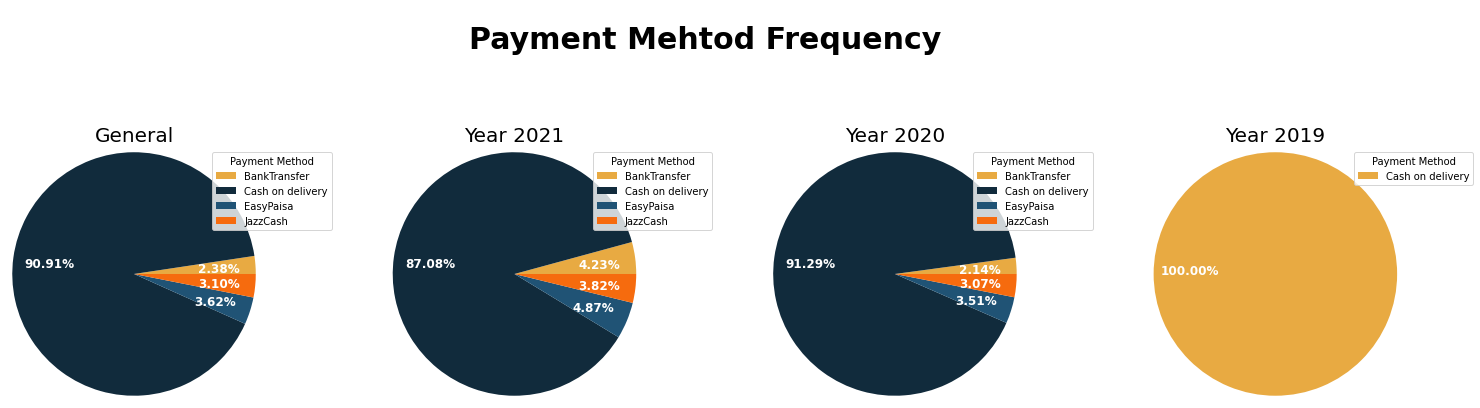

In [42]:
result = df.groupby("payment method")["payment method"].count()
result2 = df[df["year"] == 2021].groupby("payment method")["payment method"].count()
result3 = df[df["year"] == 2020].groupby("payment method")["payment method"].count()
result4 = df[df["year"] == 2019].groupby("payment method")["payment method"].count()

palette = ["#E8AA42", "#112B3C", "#205375", "#F66B0E"]

# POSITION
fig = plt.figure(figsize = (25,8))
gs = fig.add_gridspec(nrows = 2,ncols = 4, hspace = -.7, wspace = .5)
ax0 = fig.add_subplot(gs[0,2])
ax1 = fig.add_subplot(gs[1,0,])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])
ax4 = fig.add_subplot(gs[1,3])

# TITLE
ax0.text(-.25, .9,
        "Payment Mehtod Frequency",
        fontsize = 30,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(right = False, left = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL FREQUENCY
ax1.set_title("General", fontsize = 20, loc = "center")
ax1.pie(result.values, labels = None, autopct='%1.2f%%', textprops={"color":"w", "fontsize":12, "fontweight":"bold", "verticalalignment":"center_baseline"}, pctdistance = 0.7, radius=1.2, colors = palette)
ax1.legend(title="Payment Method", labels = result.index, bbox_to_anchor=(1.3,1), loc="upper right", fontsize=10,)

# FREQUENCY 2021
ax2.set_title("Year 2021", fontsize = 20, loc = "center")
ax2.pie(result2.values, labels = None, autopct='%1.2f%%', textprops={"color":"w", "fontsize":12, "fontweight":"bold", "verticalalignment":"center_baseline"}, pctdistance = 0.7, radius=1.2, colors = palette)
ax2.legend(title="Payment Method", labels = result2.index, bbox_to_anchor=(1.3,1), loc="upper right", fontsize=10,)

# FREQUENCY 2020
ax3.set_title("Year 2020", fontsize = 20, loc = "center")
ax3.pie(result3.values, labels = None, autopct='%1.2f%%', textprops={"color":"w", "fontsize":12, "fontweight":"bold", "verticalalignment":"center_baseline"}, pctdistance = 0.7, radius=1.2, colors = palette)
ax3.legend(title="Payment Method", labels = result3.index, bbox_to_anchor=(1.3,1), loc="upper right", fontsize=10,)

# FREQUENCY 2019
ax4.set_title("Year 2019", fontsize = 20, loc = "center")
ax4.pie(result4.values, labels = None, autopct='%1.2f%%', textprops={"color":"w", "fontsize":12, "fontweight":"bold", "verticalalignment":"baseline"}, pctdistance = 0.7, radius=1.2, colors = palette)
ax4.legend(title="Payment Method", labels = result4.index, bbox_to_anchor=(1.3,1), loc="upper right", fontsize=10,)


plt.show() 

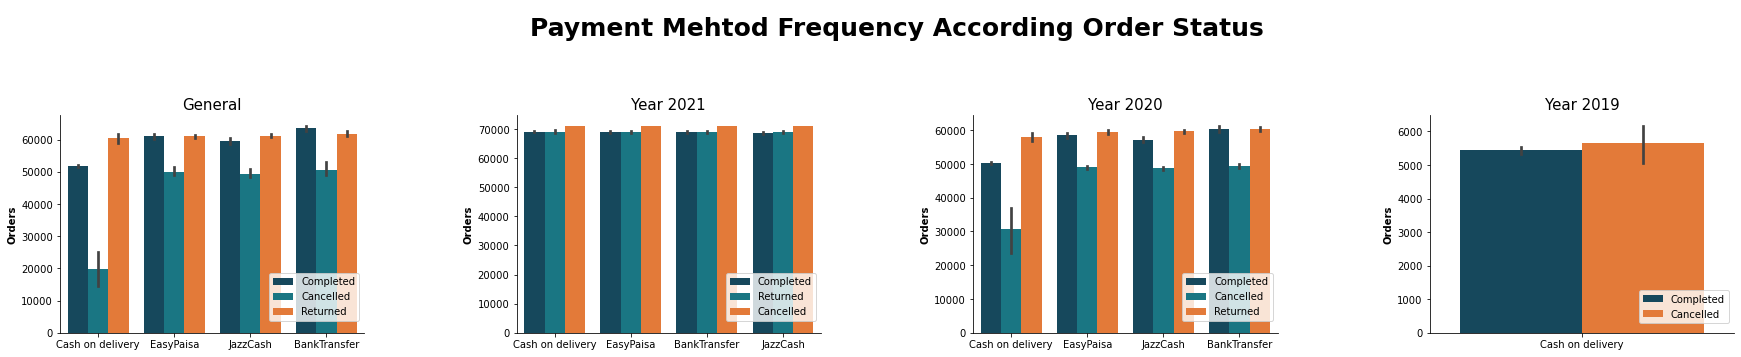

In [43]:
result2 = df[df["year"] == 2021]
result3 = df[df["year"] == 2020]
result4 = df[df["year"] == 2019]

# POSITION
fig = plt.figure(figsize = (30,6))
gs = fig.add_gridspec(nrows = 2,ncols = 4, hspace = -.5, wspace = .5)
ax0 = fig.add_subplot(gs[0,2])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])
ax4 = fig.add_subplot(gs[1,3])

colors = ["#0A4D68", "#088395", "#FF731D"]

# TITLE
ax0.text(-.25, .9,
        "Payment Mehtod Frequency According Order Status",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(right = False, left = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL 
ax1.set_title("General", fontsize = 15, loc = "center")
sns.barplot(data = df, x = "payment method", y = "order number", hue = "order status", palette = colors, ax = ax1)
ax1.legend(bbox_to_anchor = (1,0.3), loc = "upper right", fontsize=10)
ax1.set_xlabel("")
ax1.set_ylabel("Orders", fontweight = "bold")

# 2021 
ax2.set_title("Year 2021", fontsize = 15, loc = "center")
sns.barplot(data = result2, x = "payment method", y = "order number", hue = "order status", palette = colors, ax = ax2)
ax2.legend(bbox_to_anchor = (1,0.3), loc = "upper right", fontsize=10)
ax2.set_xlabel("")
ax2.set_ylabel("Orders", fontweight = "bold")

# 2020 
ax3.set_title("Year 2020", fontsize = 15, loc = "center")
sns.barplot(data = result3, x = "payment method", y = "order number", hue = "order status", palette = colors, ax = ax3)
ax3.legend(bbox_to_anchor = (1,0.3), loc = "upper right", fontsize=10)
ax3.set_xlabel("")
ax3.set_ylabel("Orders", fontweight = "bold")

# 2019 
ax4.set_title("Year 2019", fontsize = 15, loc = "center")
sns.barplot(data = result4, x = "payment method", y = "order number", hue = "order status", palette = ["#0A4D68", "#FF731D"], ax = ax4)
ax4.legend(bbox_to_anchor = (1,0.22), loc = "upper right", fontsize=10)
ax4.set_xlabel("")
ax4.set_ylabel("Orders", fontweight = "bold")

for i in ["top", "right"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)

In [44]:
def line_plot_sales(pivot, width, height, plotting,avg_series = None, ax = None, sort = False):
    if ax is None:
            ax = plt.gca()       
    ax = getattr(sns, plotting)(x = pivot.index, y = 'total items', data = pivot, color = "#1687A7",  marker="o", ax = ax)
    ax.set_facecolor("white")
    ax.grid(axis = "both", linestyle = ":", zorder = 0, dashes = (1,5))
    ax.ticklabel_format(style = 'plain', axis = 'y')
    ax.spines[["right", "top"]].set_visible(False)
        
    if avg_series is not None:
        ax.axhline(y = avg_series, color = "#FF731D", linestyle = '-', linewidth = 1)
        ax.text(pivot.index[0], avg_series, f'Avg: {avg_series:,.2f}', color = "#FF731D", fontsize = 10.5, ha = 'center', va = 'bottom')

    for x, y in enumerate(pivot['total items']):
        label = f'{y:,.0f}'
        ax.annotate(label, (x, y), textcoords = 'offset points', xytext = (0, 4), ha = 'center', fontsize = 13)
    return ax

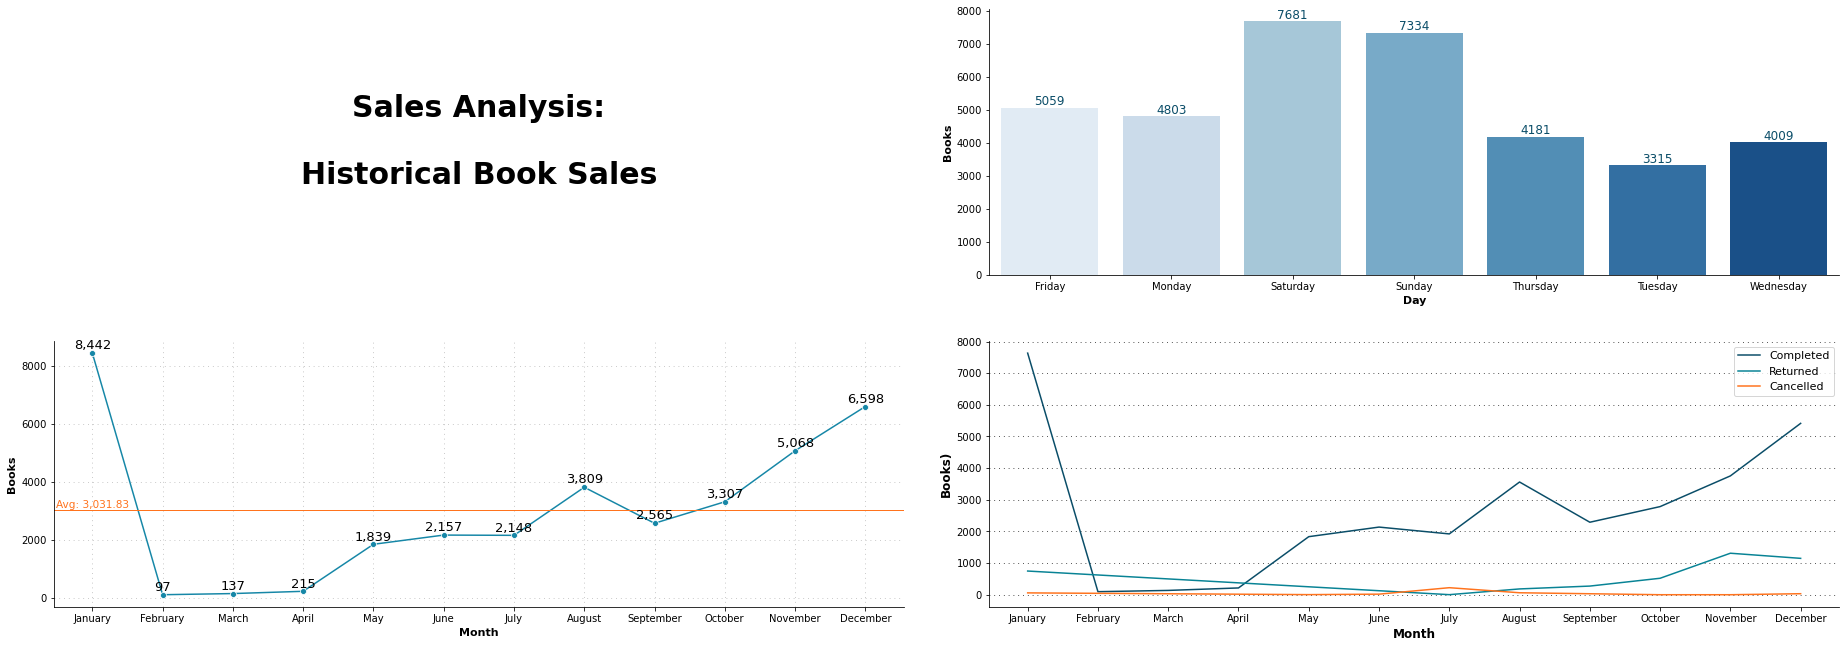

In [45]:

# VARIABLES
sales = df.groupby([df['order date'].dt.month,df['order date'].dt.strftime('%B')]).sum().reset_index(level=0)
avg = sales['total items'].mean()

orders = df.groupby('day').sum().reset_index()

com = df[df["order status"] == "Completed"].groupby([df['order date'].dt.month,df['order date'].dt.strftime('%B')]).sum().reset_index(level=0)
re = df[df["order status"] == "Returned"].groupby([df['order date'].dt.month,df['order date'].dt.strftime('%B')]).sum().reset_index(level=0)
can = df[df["order status"] == "Cancelled"].groupby([df['order date'].dt.month,df['order date'].dt.strftime('%B')]).sum().reset_index(level=0)

# POSITION
fig = plt.figure(figsize = (32,11))
gs = fig.add_gridspec(nrows = 2, ncols = 2, hspace = 0.25, wspace = 0.1)
ax_title = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax_title.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# TITLE
ax_title.spines[["top", "left", "right", "bottom"]].set_visible(False)
ax_title.tick_params(left = False, bottom = False)
ax_title.set(xticks = [], yticks = [])
ax_title.text(0.5,0.5,
         'Sales Analysis:\n\nHistorical Book Sales',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize = 30, fontweight='bold',
         color="#000000")

# GLOBAL SALES
line_plot_sales(sales, 15, 6, 'lineplot', avg, ax2)
ax2.set_ylabel("Books", fontsize = 11, fontweight = "bold")
ax2.set_xlabel("Month", fontsize = 11, fontweight = "bold")

# GLOBAL GROWTH
sns.barplot(data = orders, x = "day", y = "total items", ax = ax1, palette = "Blues")
ax1.set_ylabel("Books",fontsize = 11, fontweight = "bold")
ax1.set_xlabel("Day",fontsize = 11, fontweight = "bold")
ax1.bar_label(ax1.containers[0], label_type = "edge", color ="#0A4D68", fontstyle = "normal", fontsize = 12)
ax1.spines[["top", "right"]].set_visible(False)

# REGIONAL SALES
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.lineplot(ax=ax3,data=com,x=com.index,y = 'total items', color = '#0A4D68', label='Completed')
sns.lineplot(ax=ax3,data=re,x=re.index,y = 'total items', color = '#088395', label='Returned')
sns.lineplot(ax=ax3,data=can,x=can.index,y = 'total items', color = '#FF731D', label='Cancelled')
ax3.set_xlabel("Month", fontsize = 12, fontweight='bold')
ax3.set_ylabel("Books)", fontsize = 12, fontweight='bold')
ax3.legend(bbox_to_anchor = (1,1), loc = "upper right", fontsize=11)

for i in ["top", "right"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

## **CONCLUSIONS**

* Make money from the internet is the best-selling book in gufhtugu, with islamabad, Karachi and lahore being the cities in which it has the largest market presence. Is a topic that has gained significant interest in recent years, as more people are looking for ways to earn money online. The popularity of this book in cities such as Islamabad, Karachi, and Lahore suggests that there is a growing number of people in Pakistan who are interested in learning how to make money online.The book may cover a range of topics related to making money online, including e-commerce, affiliate marketing, blogging, freelancing, and other opportunities available on the internet. It may also provide guidance on how to start an online business, build a website, or promote products and services through various online platforms. The internet has provided many opportunities for people to earn money from the comfort of their own homes, and the popularity of this book suggests that many individuals in Pakistan are interested in exploring these opportunities. With the rise of e-commerce and digital marketing, there are many ways to earn a decent income online, and this book may serve as a valuable resource for those looking to get started. Overall, the popularity of "Make Money from the Internet" in cities such as Islamabad, Karachi, and Lahore is an indication of the growing interest in online entrepreneurship and the potential for individuals to earn a living through the internet.

* Python is a high-level programming language that has become increasingly popular in recent years due to its simplicity, versatility, and wide range of applications. It is used for a variety of purposes such as web development, data analysis, artificial intelligence, scientific computing, and automation. The growing interest in Python in Pakistan since 2015, as indicated by Google Trends, suggests that more people in the country are becoming interested in learning programming and using it for various applications. This trend is not unique to Pakistan, as Python has gained popularity worldwide, with many companies and organizations adopting it for their projects. Python's popularity can also be attributed to its vast and active community of developers who contribute to its development and create useful libraries and tools for the language. This makes it easier for beginners to learn and use Python, as they have access to a wealth of resources and support. Overall, Python's versatility, ease of use, and growing popularity make it a valuable tool for individuals and organizations in Pakistan and around the world. Its continued growth and development are likely to lead to even greater demand for it in the future.

* In e-commerce, order cancellation and return rates are important metrics that reflect customer satisfaction and the overall health of the business. A low order cancellation rate and a manageable return rate indicate that customers are generally happy with their purchases and that the business is operating efficiently. A 0.78% order cancellation rate suggests that the business is doing a good job of managing inventory and fulfilling orders. A low cancellation rate means that the business is able to accurately track inventory and prevent overbooking or overselling, which can lead to frustrated customers and lost sales. Additionally, a low cancellation rate can help maintain a positive reputation and build customer loyalty, as customers are more likely to return to a business that reliably delivers on its promises. A 5.92% return rate, while slightly higher than the order cancellation rate, is still within a manageable range. A return rate of less than 10% is generally considered good in e-commerce. A reasonable return rate means that customers are satisfied with their purchases and feel comfortable returning items if needed. However, a high return rate can indicate that there are issues with the quality of the products or services, or that the business is not accurately describing its offerings. Overall, a low order cancellation rate and a manageable return rate suggest that the business is operating efficiently and providing good customer service. It is important for businesses to monitor these metrics regularly and take steps to improve them if necessary, as they can have a significant impact on the bottom line.

* The fact that COD is the most commonly used payment method by customers suggests that it is a convenient and preferred option for many. This may be due to a variety of reasons, such as a lack of access to online payment methods or a preference for paying in cash. Additionally, COD can provide a sense of security for customers, as they only pay once they have received and inspected the items they ordered. The fact that COD has the fewest cases of cancelled orders is also significant. This may be because customers are more likely to follow through with their orders when they have already committed to paying for them in cash upon delivery. It may also be because the payment is made directly to the delivery person, which can provide a sense of accountability for both the customer and the seller. However, it is important to note that COD also has some potential drawbacks. For example, it can increase the risk of fraud or non-payment, as sellers may not have a way to verify the customer's identity or payment information before shipping the items. Additionally, COD can create additional expenses for the seller, as they may need to hire additional staff to handle cash transactions. Overall, while COD may be a preferred payment method for many customers and may have fewer cases of cancelled orders, it is important  to carefully consider the potential benefits and drawbacks before deciding whether to offer it as a payment option.

* The sales history of Gufhtugu suggests that there have been significant fluctuations in demand over time. While the business averages 3031 books ordered per month, there was a peak in January when 8442 books were ordered, suggesting that there may have been a surge in demand during that time. However, sales dropped by more than 95% in the following months of February, March, and April. This sudden drop in sales may have been due to a variety of factors, such as changes in customer preferences or market conditions. It is encouraging to note that sales stabilized after May and have been growing steadily since then. This suggests that the business was able to identify and address the factors that were causing the decline in sales, and that it has been able to regain the trust of its customers. It is important for businesses to monitor sales trends over time and make adjustments as necessary in order to maintain growth and profitability. Finally, the observation that weekends tend to sell more books than weekdays is not uncommon in retail. Many consumers have more free time on weekends and may be more likely to engage in leisure activities such as reading. This trend may be useful for the business to consider when planning marketing and promotional activities, such as offering weekend-specific discounts or promotions. Overall, the sales history of Gufhtugu suggests that the business has experienced both ups and downs in demand over time, but has been able to recover and continue growing. By carefully monitoring sales trends and adjusting strategies as necessary, the business can continue to maintain its growth and profitability over the long term.




